<a href="https://colab.research.google.com/github/KimNamHo2020/OpenCV-ss/blob/main/6CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경계 검출(Edge Detection) 과정을 수행합니다.


*   경계 검출: 밝기 변화가 큰 영역을 검출하여 경계를 찾는 과정.
*  Gradient 연산: x축과 y축의 밝기 변화율을 계산.
*   이진화: 경계 강도에 기반해 경계와 배경을 분리.






In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


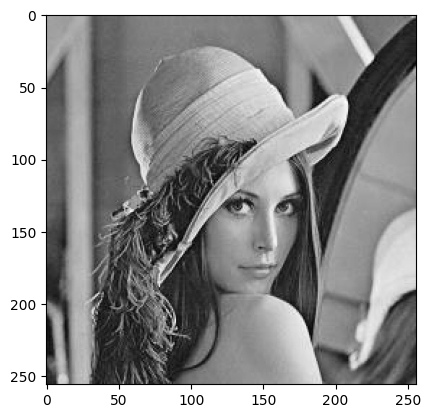

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

In [ ]:
gx = np.array([[-1, 0], [0,1]], dtype = int)
gy = np.array([[0, 1], [-1,0]], dtype = int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

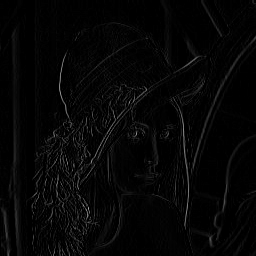

In [ ]:
cv2_imshow(outImg)

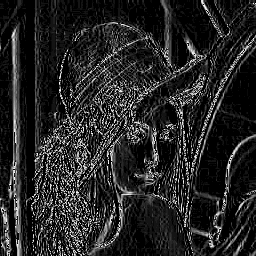

In [ ]:
outImg = outImg * 10
cv2_imshow(outImg)

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

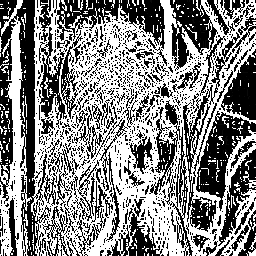

In [ ]:
threshold = 10

for h in range(gImg.shape[0]) :
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold) :
      outImg[h,w] = 255

cv2_imshow(outImg)



 Sobel 필터를 이용한 경계 검출과 Canny Edge Detection을 수행합니다.


*  Sobel 필터: 밝기 변화(gradient)를 계산하여 경계를 검출합니다.
*  Canny Edge Detection: 노이즈를 제거하고 정교한 경계선을 생성합니다.

*  Gradient 방향 분석: 경계의 각도 정보를 활용하여 이미지 구조를 파악할 수 있습니다.






(256, 256)


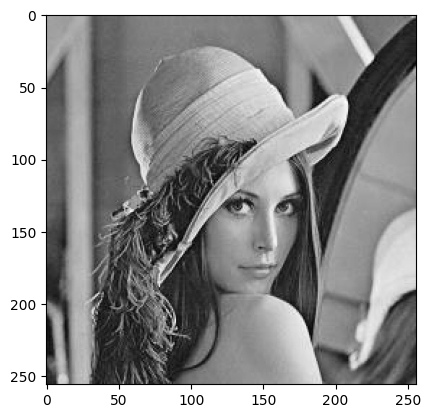

In [ ]:

img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

In [ ]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


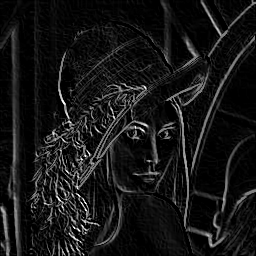

In [ ]:
outimg = outImg * 5
cv2_imshow(outImg)

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

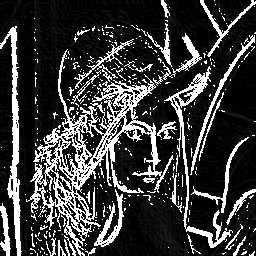

In [ ]:
threshold = 30

for h in range(gImg.shape[0]) :
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold) :
      outImg[h,w] = 255

cv2_imshow(outImg)

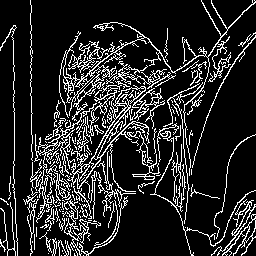

In [ ]:
cannyImg = cv2.Canny(gImg, 20, 200)
cv2_imshow(cannyImg)

In [ ]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [ ]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

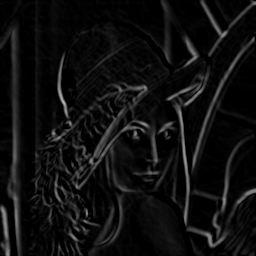

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutImg)

In [ ]:
cannyDirection = np.arctan2(y,x)